In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\Data Sheet\insurance.csv') #read the data 
data.head() #Printing the First five results of the data 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Printing the last five result of the data set
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Describe

In [4]:
data.shape #checking the shape of the dataset

(1338, 7)

In [5]:
#Getting the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This is provide the datatypes of the columns . 

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


It gives the DataFrame contains numerical data, the description contains these information for each column.

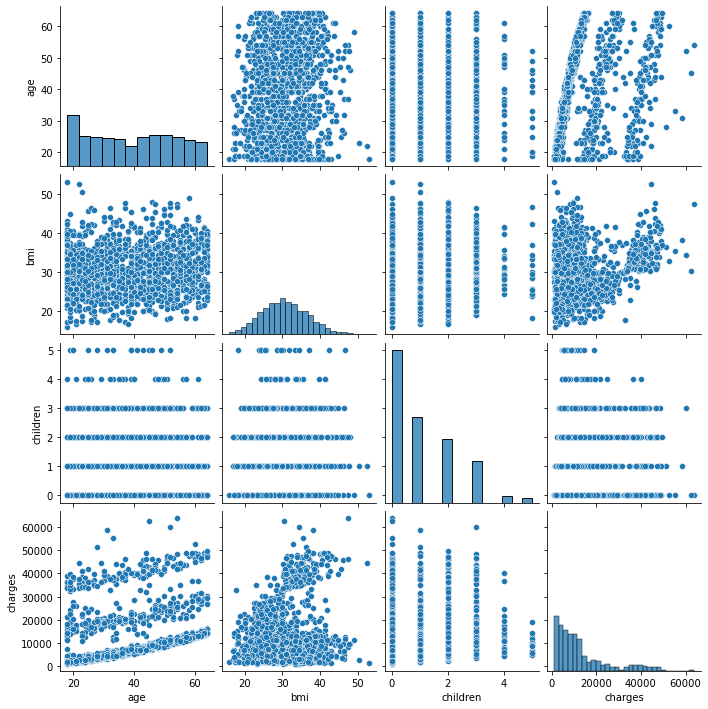

In [7]:
sns.pairplot(data)

Pairplot is used visualizes given data to find the relationship between them where the variables can be continuous or categorical.

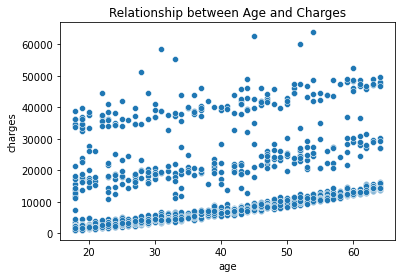

In [8]:
plt.title('Relationship between Age and Charges')
sns.scatterplot(x = data['age'],  y= data['charges'])
plt.show()

Finding the correlation between age and charges by using the scatter plot. 

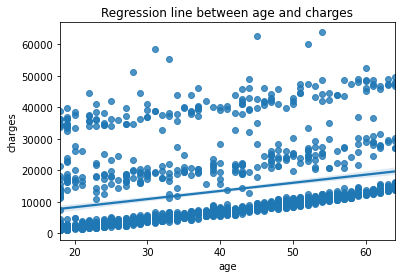

In [9]:
plt.title('Regression line between age and charges')
sns.regplot(x = data['age'],y = data['charges'])
plt.show()

Here the regession line shows positive real between age and charges

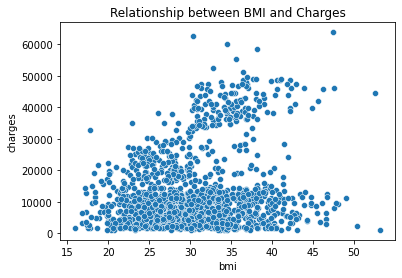

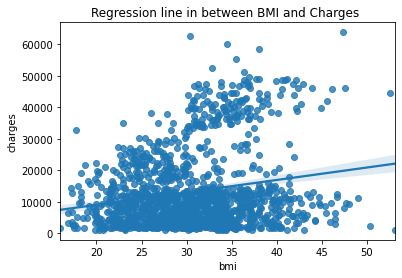

In [10]:
plt.title('Relationship between BMI and Charges')
sns.scatterplot(x = data['bmi'], y =data['charges'])
plt.show()

plt.title('Regression line in between BMI and Charges ')
sns.regplot(x = data['bmi'], y = data['charges'])
plt.show()


There is positive relationship between bmi and charges.

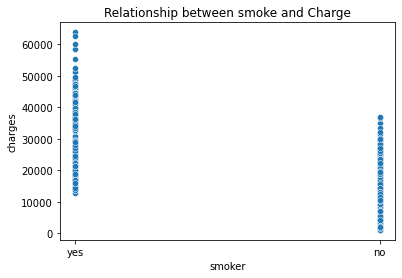

In [11]:
plt.title('Relationship between smoke and Charge')
sns.scatterplot(x = data['smoker'], y=data['charges'])
plt.show()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


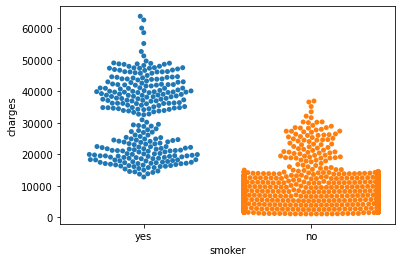

In [12]:
sns.swarmplot(x=data['smoker'],y = data['charges'] )
plt.show()

A swarm plot is another way of plotting the distribution of an attribute or the joint distribution of a couple of attributes.

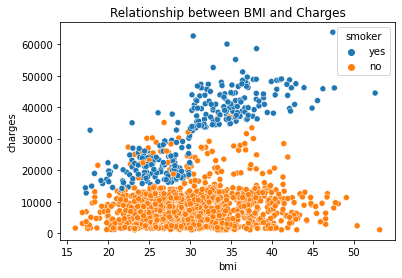

In [13]:
plt.title('Relationship between BMI and Charges')
sns.scatterplot(x = data['bmi'], y = data['charges'],hue = data['smoker'])
plt.show()

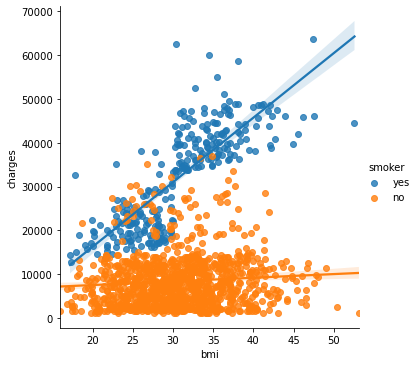

In [14]:
sns.lmplot(x = 'bmi',y = 'charges', hue = 'smoker',data = data)
plt.show()

Here we can observe from the plot smoker pays more charges than the non smoker and we find a linear relationship between chages and smoker.  

# Find the relation between childern and charges by ploting Bar plot . 

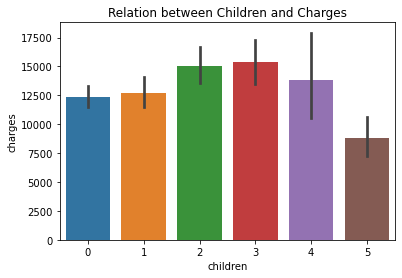

In [15]:

plt.title('Relation between Children and Charges')
sns.barplot(x=data['children'], y=data['charges'])
plt.show()

From this plot we can see that childern 2 & 3 pays more charges . 

# Find the relation between sex and charges. 

C:\Users\singh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\singh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


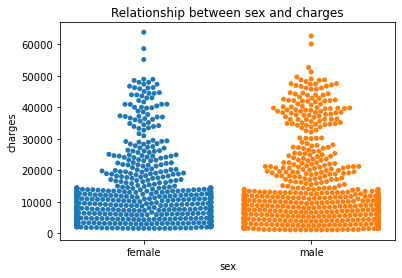

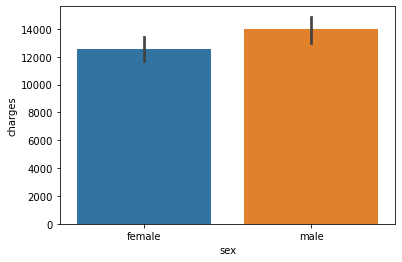

In [16]:
plt.title ('Relationship between sex and charges')
sns.swarmplot(x = data['sex'], y = data['charges'])
plt.show()

sns.barplot(x = data['sex'], y = data['charges'])
plt.show()

Here we can say that male pays more charges than female . 

# Finding correlation between Region and Charges by ploting a barplot plot

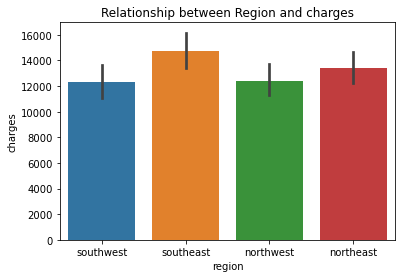

In [17]:
plt.title('Relationship between Region and charges')
sns.barplot(x = data['region'], y = data['charges'])
plt.show()

# Final Corelation plot

<AxesSubplot:>

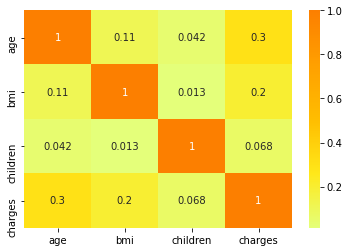

In [18]:
sns.heatmap(data.corr() , cmap = 'Wistia' , annot = True)

# Data Preprocessing 

In [19]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Here is the no missing value present in the data set. 

<AxesSubplot:>

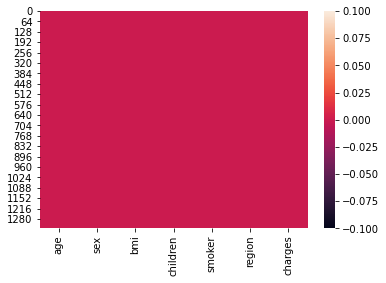

In [20]:
sns.heatmap(data.isnull())

# Outlier Detection using Z-Score Method

What is outliers ?
An outlier is a data point that is noticeably different from the rest. 

In [21]:
def outlier_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3.5
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print(outliers)
    return len(outliers), outliers

In [22]:
##Checking weather age column has outliers or not. 
age_outliers_number,age_outliers = outlier_zscore(data.age)

[]


In [23]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

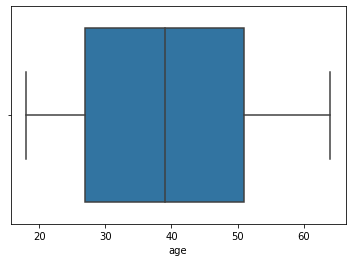

In [24]:
sns.boxplot(x = 'age', data = data)
plt.show()

Here no outliers present in the data set .


In [25]:
##Now we check weather bmi has any outlers or not .
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi'>

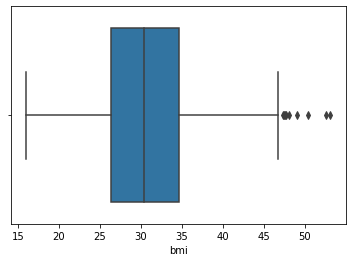

In [26]:
sns.boxplot(x='bmi', data= data)

In [27]:
#Here we can see bmi has some outliers presnt in the data set. 

bmi_outliers_number,bmi_outliers =outlier_zscore(data.bmi)

[52.58, 53.13]


Now We should remove the outliers in the bmi data set. 

In [28]:
#Removing the outliers in the bmi

for num, i in enumerate(data['bmi']):
    if i in bmi_outliers:
        data['bmi'][num] = 48.5

<ipython-input-28-a2eb8f54ac67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bmi'][num] = 48.5


In [29]:
bmi_outliers_number,bmi_outliers = outlier_zscore(data.bmi)

[]


<AxesSubplot:xlabel='bmi'>

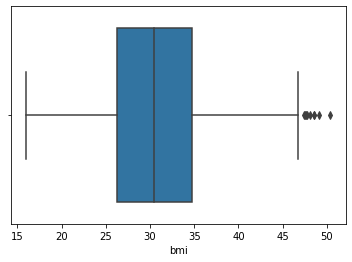

In [30]:
sns.boxplot(x = 'bmi', data = data)

In [31]:
data['bmi'].describe()

count    1338.000000
mean       30.656887
std         6.076756
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        50.380000
Name: bmi, dtype: float64

In [32]:
#Checking the Childern has outliers or not.
data['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

<AxesSubplot:xlabel='children'>

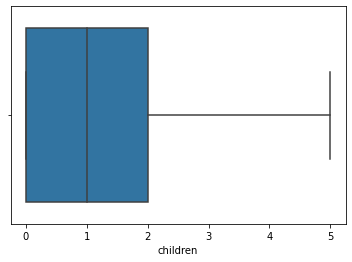

In [33]:
sns.boxplot(x = 'children', data = data)

Boxplot shows that it has no outliers present in the dataset. 

In [34]:
#Checking weather charges has outliers 
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges'>

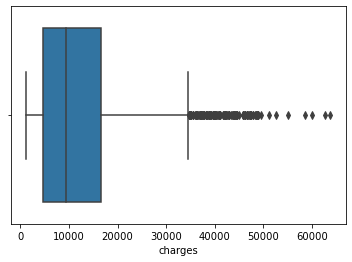

In [35]:
sns.boxplot(x= 'charges', data = data)

Heavy outliers present in the charges in dataset.We have to remove the outliers present in the data set . 

In [36]:
charges_outliers_number,charges_outliers = outlier_zscore(data.charges)

[63770.42801, 58571.07448, 60021.39897, 62592.87309]


Here the 4 data poins outlier in the dataset,so we have to remove these points from the data set. 

In [37]:
print(f"The number of outliers are {charges_outliers_number} and the outliers are {charges_outliers}")

The number of outliers are 4 and the outliers are [63770.42801, 58571.07448, 60021.39897, 62592.87309]


In [38]:
for num, i in enumerate(data['charges']):
    if i in bmi_outliers:
        data['charges'][num] = 55000.00

In [39]:
outliers_charges_number, outliers_number = outlier_zscore(data.charges)

[63770.42801, 58571.07448, 60021.39897, 62592.87309]


In [40]:
#Removing the outliers of bmi 
for num, i in enumerate(data['charges']):
    if i in charges_outliers:
        data['charges'][num] = 55000.00000

<ipython-input-40-5a2a3d3f4475>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['charges'][num] = 55000.00000


# Label Encoding 

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

In [43]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Multiple Linear Regression 

In [44]:
data.shape

(1338, 7)

In [45]:
x = data.iloc[ : , : -1]
y = data.iloc[ : , -1]

In [46]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [47]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Spliting the Dataset in to the train and test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 51)

In [50]:
print('shape of x_train =', x_train.shape)
print('shape of x_test=',x_test.shape)
print('shape of y_train=',y_train.shape)
print('shape of y_test=',y_test.shape)

shape of x_train = (1070, 6)
shape of x_test= (268, 6)
shape of y_train= (1070,)
shape of y_test= (268,)


# Feature scaling 

In [51]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

In [52]:
x_train

array([[-0.01679025, -1.00187091, -1.1105495 ,  3.22869711, -0.50145986,
         0.44715758],
       [ 1.46855153,  0.99813258,  1.5437603 , -0.90867523,  1.99417757,
         1.36024652],
       [-0.93628753,  0.99813258, -0.54839219,  1.57374817, -0.50145986,
        -1.37902031],
       ...,
       [-0.58263473, -1.00187091,  0.0808266 , -0.90867523, -0.50145986,
        -1.37902031],
       [-1.50213202,  0.99813258,  0.1826607 ,  0.7462737 ,  1.99417757,
         0.44715758],
       [ 0.54905424,  0.99813258,  0.91122983, -0.08120077,  1.99417757,
         0.44715758]])

In [53]:
x_test

array([[ 0.65235748,  0.95618289, -0.20576697, -0.90850632, -0.53131596,
         0.40567091],
       [ 1.53054152,  0.95618289,  0.29399535, -0.90850632,  1.88211925,
         1.28244351],
       [-1.10401059, -1.04582503, -0.52497   , -0.90850632, -0.53131596,
         0.40567091],
       ...,
       [-1.46992061,  0.95618289, -0.11709946, -0.90850632,  1.88211925,
         0.40567091],
       [ 1.67690553,  0.95618289,  0.16744263, -0.90850632,  1.88211925,
        -1.3478743 ],
       [ 1.23781351, -1.04582503,  0.21338853,  1.61024914, -0.53131596,
        -1.3478743 ]])

# LinearRegession Model 

Regression = Its means thar find the realtionship between the variable. 

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [56]:
print('intercept=',lr.intercept_)
print('coefficent=',lr.coef_)

intercept= 13118.329862316823
coefficent= [3474.58552231  -98.20840536 1891.57642649  619.24883275 9486.48701772
 -429.03032908]


# Model Prediction 

In [57]:
lr.score(x_test,y_test)

0.7518147114576527